### CMB Assigment 2 Program ###

In [1]:
# Program, run imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

Create Pandas Dataframe

In [2]:
df = pd.read_csv("/Users/Fabian/Desktop/test.csv")
#df = pd.read_csv("data/2022-01-04_complete.csv")
df.head()
# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info', 'dst port']


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2022-01-04 16:44:06.405328,192.168.0.22,188.164.238.26,TCP,54,"60967 > 443 [FIN, ACK] Seq=1 Ack=1 Win=5744 ..."
1,2,2022-01-04 16:44:06.418960,192.168.0.22,188.164.238.26,TCP,54,60967 > 443 [ACK] Seq=2 Ack=2 Win=5743 Len=0
2,3,2022-01-04 16:44:14.010838,192.168.0.22,188.164.238.26,TCP,58,54623 > 443 [SYN] Seq=0 Win=5744 Len=0 MSS=1436
3,4,2022-01-04 16:44:14.031386,192.168.0.22,188.164.238.26,TCP,54,54623 > 443 [ACK] Seq=1 Ack=1 Win=5744 Len=0
4,5,2022-01-04 16:44:14.035643,192.168.0.22,188.164.238.26,TLSv1.2,353,Client Hello


In [3]:
# helper functions
def utcEntryToTimestamp(entry):
    row_entry = entry.split(".")[0]
    TIME_FORMAT='%Y-%m-%d %H:%M:%S'
    ts = int(datetime.strptime(row_entry, TIME_FORMAT).timestamp())
    return ts

def utcRowToTimestamp(row):
    return utcEntryToTimestamp(row.at['Time'])
utcRowToTimestamp(df.loc[0])
# print(df.loc[0].at['Time'])

1641311046

### Protocol packet distribution ###

Protocol
DNS            1385
HTTP            482
HTTP/JSON       580
TCP          172660
TLSv1             8
TLSv1.2       51693
Name: Source, dtype: int64


/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_83628/1175584780.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


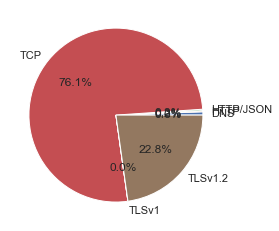

In [4]:
print(df.groupby('Protocol').Source.count())

count_protocol_packets = df.groupby('Protocol').Source.count()

fig, ax = plt.subplots()
ax.pie(count_protocol_packets, labels=count_protocol_packets.keys(), autopct='%1.1f%%',)
fig.show()

### Amount of data traffic per protocol ###

Protocol
DNS            132349
HTTP           103953
HTTP/JSON      280055
TCP           9583876
TLSv1            1592
TLSv1.2      10109785
Name: Length, dtype: int64


/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_83628/819471806.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


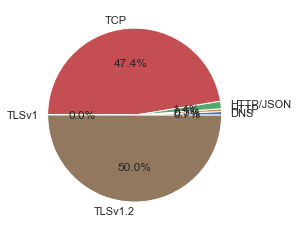

In [5]:
count_protocol_traffic = df.groupby('Protocol').Length.sum()
print(count_protocol_traffic)
fig, ax = plt.subplots()
ax.pie(count_protocol_traffic, labels=count_protocol_traffic.keys(), autopct='%1.1f%%',)
fig.show()

### Average Data length per packet ###

/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_83628/1773694957.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Protocol
DNS           95.558845
HTTP         215.670124
HTTP/JSON    482.853448
TCP           55.507216
TLSv1        199.000000
TLSv1.2      195.573579
Name: Length, dtype: float64


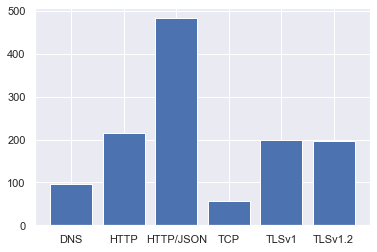

In [6]:
average_protocol_packet_length = df.groupby('Protocol').Length.sum() / df.groupby('Protocol').Length.count()
print(average_protocol_packet_length)
fig, ax = plt.subplots()
ax.bar(average_protocol_packet_length.keys(), average_protocol_packet_length)
fig.show()

### Source addresses ###

In [7]:
print(df.groupby('Source').Time.count())
print(df.groupby('Destination').Time.count())

Source
192.168.0.1         682
192.168.0.121     25202
192.168.0.2          28
192.168.0.200      2891
192.168.0.22     196379
192.168.0.88         54
192.168.0.9        1572
Name: Time, dtype: int64
Destination
104.121.176.87        26
188.164.238.26    196352
192.168.0.1          703
192.168.0.121       3461
192.168.0.2           25
192.168.0.22          25
192.168.0.88          54
192.168.0.9            8
34.245.145.101      1457
34.250.121.83         22
52.209.43.253         12
54.216.189.126        12
54.220.43.22          12
81.169.180.11       8788
81.169.210.193        13
85.214.202.106      9014
85.214.250.60       3198
85.214.67.97        3603
88.221.139.67          8
92.122.24.124         15
Name: Time, dtype: int64


### DNS requests ###

In [8]:
df_dns = df[df['Protocol'].isin(['DNS'])]
df_dns.head()
df_dns_requests_1 = df_dns[df_dns['Info'].str.contains('Standard query')]
# does not contain response
df_dns_requests_2 = df_dns_requests_1[~df_dns_requests_1['Info'].str.contains('response')]
df_dns_resources = df_dns_requests_2['Info'].apply(lambda x: x.split(' ')[-1]).value_counts()
print(df_dns_resources)
# print(df_dns_requests)
# print(df_dns['Info'])


server.chillibits.com               528
pool.ntp.org                         54
0.debian.pool.ntp.org                54
0.pool.ntp.org                       24
api.sensor.community                 17
api-rrd.madavi.de                    15
msmetrics.ws.sonos.com                3
firmware.sensor.community             2
update-timezone.sonos.com             1
service-catalog.ws.sonos.com          1
update.sonos.com                      1
update-firmware.sonos.com             1
www.mvg.de                            1
feature-config.sslauth.sonos.com      1
Name: Info, dtype: int64


### Data traffic over time ###

2022-01-04 15:30:00
[ 119. 2362. 2383. 2385. 2373. 2380. 2396. 2421. 2397. 2360. 2397. 2360.
 2340. 2378. 2397. 2378. 2365. 2368. 2378. 2431. 2385. 2349. 2373. 2393.
 2393. 2356. 2357. 2348. 2358. 2309. 2298. 2291. 2317. 2315. 2305. 2308.
 2333. 2299. 2298. 2353. 2316. 2306. 2388. 2373. 2352. 2361. 2372. 2354.
 2367. 2351. 2342. 2362. 2356. 2355. 2347. 2382. 2370. 2344. 2357. 2376.
 2326. 2376. 2364. 2363. 2371. 2413. 2348. 2362. 2320. 2414. 2382. 2358.
 2329. 2377. 2367. 2367. 2342. 2350. 2407. 2393. 2326. 2381. 2398. 2384.
 2338. 2391. 2391. 2393. 2394. 2385. 2393. 2359. 2357. 2371. 2384. 2425.
 2172.]
[  9. 209. 210. 214. 210. 211. 212. 217. 212. 210. 212. 209. 207. 211.
 212. 211. 210. 210. 210. 217. 213. 209. 211. 211. 211. 210. 209. 209.
 214. 207. 206. 206. 207. 207. 206. 207. 210. 208. 207. 213. 207. 206.
 211. 210. 209. 210. 212. 211. 210. 210. 208. 209. 210. 209. 209. 213.
 212. 209. 210. 210. 208. 211. 210. 210. 210. 216. 209. 211. 206. 216.
 210. 210. 204. 211. 211. 210. 20

/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_83628/250705815.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_83628/250705815.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


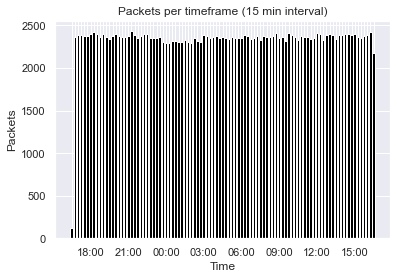

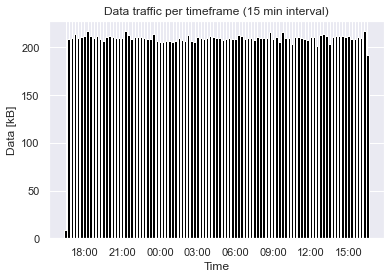

In [9]:
def timeMapping(x):
    # include time difference UTC+1
    time = datetime.utcfromtimestamp(x*min_15_duration + 3600)
    if time.minute == 0 and time.hour % 3 == 0:
        return time.strftime("%H:%M")
    else:
        return ""

# find first and last timestamp, then create data structure
min_15_duration = 60 * 15
df_time_mod = df.copy()
df_time_mod['Time'] = df_time_mod['Time'].apply(lambda x: utcEntryToTimestamp(x)) # map to 15 min window
df_time_mod.head()
first_entry = df_time_mod.loc[0].at['Time'] // min_15_duration
last_entry = df_time_mod.iloc[-1].at['Time'] // min_15_duration


offset = first_entry
count_packets = np.zeros(last_entry - first_entry + 1)
length_packets = np.zeros(last_entry - first_entry + 1)
print(datetime.utcfromtimestamp(offset * min_15_duration))
x_values_packets = list(range(offset, last_entry + 1))

mapping_res = list(map(timeMapping, x_values_packets))

# print(mapping_res)

for index, row in df_time_mod.iterrows():
    ts = row.at['Time'] // min_15_duration
    count_packets[ts - offset] += 1
    length_packets[ts - offset] += row.at['Length']

length_packets = length_packets // 1000
print(count_packets)
print(length_packets)

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Packets')
plt.title('Packets per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, count_packets, color='black')
fig.show()

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Data [kB]')
plt.title('Data traffic per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, length_packets, color='black')
fig.show()